<a href="https://colab.research.google.com/github/amaartin/Senales-y-Sistemas/blob/main/Proyecto_Final/Proyecto_Final_S%26S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Señales y Sistemas #
# De Fourier al Wifi/5G: Anatomía de una señal inalambrica

Estudiantes:

- Adrian Rodrigo Suarez Martinez
- Maria Isabel Aristizabal Medina
- Julian David Morales






VIDEO EXPLICATIVO EN YOUTUBE : https://www.youtube.com/watch?v=djNgVyMV-o4

#Conceptos Clave

# Transformada de Fourier (FT,DTF.FFT)

#Trasformada de Fourier FT


\begin{equation}
X(\omega) = \mathscr{F} \{x(t) \} = \int_{-\infty}^{+\infty}{x(t)e^{-j\omega t}dt}.
\end{equation}



La trasformada de fourier es una extension de la serie de fourier en $t\in(-\infty,+\infty)$

Algunas de sus principales propiedades son:
1. Linealidad

Si:
$$x₁(t) → X₁(f)$$
$$x₂(t) → X₂(f)$$
Entonces:
$$a·x₁(t) + b·x₂(t) → a·X₁(f) + b·X₂(f)$$

2. Desplazamiento en el tiempo

Si:
$$x(t) → X(f)$$
Entonces:
$$x(t - t₀) → X(f)·e^{-j2πf t₀}$$

3. Desplazamiento en frecuencia
Si:
$$x(t) → X(f)$$
Entonces:
$$x(t)·e^{j2πf₀t} → X(f - f₀)$$

4. Escalamiento en el tiempo

Si:
$$x(t) → X(f)$$
Entonces:

$$x(at) → (1/|a|)·X(f/a)$$

5. Simetría (Dualidad)
Si:
$$x(t) → X(f)$$
Entonces:
$$X(t) → x(-f)$$

6. Convolución en el tiempo
Si:
$$x(t) * h(t) → X(f)·H(f)$$

(Convolución en el tiempo equivale a multiplicación en frecuencia)

7. Multiplicación en el tiempo
Si:
$$x(t)·h(t) → X(f) * H(f)$$
(Multiplicación en el tiempo equivale a convolución en frecuencia)



#Trasformada de Fourier en Tiempo discreto DTF


\begin{equation}
X(\omega) = \sum_{k\in\mathbb{Z}}{x[k]e^{-j\omega k}},
\end{equation}


Podemos adicionalemte analizar señales que esten tranajando en tiempo discreto $x[k]\in \mathbb{R} ,\mathbb{C},$ con $k\in\mathbb{Z}$, con el fin de calcular su espectro en frecuencia continuo.$X(\omega)\in \mathbb{R} ,\mathbb{C}$, pero con $\omega$ continua en el intervalo $\omega\in [-\pi,+\pi]$ o $\omega\in [0,2\pi],$ dado que las bases de representación requieren restringir la codificación de la señal $x[k]$ utilizando funciones seno y coseno originales

# Transformada Raida de Fourier
La Transformada Rápida de Fourier (FFT, por sus siglas en inglés: Fast Fourier Transform) es un algoritmo eficiente para calcular la Transformada Discreta de Fourier (DFT) de una señal en tiempo discreto. Su objetivo es reducir el costo computacional del cálculo directo de la DFT.

$$X[k]=
n=0
∑
N−1x[n]⋅e −j N 2π kn,para k=0,1,…,N−1 $$
𝑥[𝑛]: muestra en el tiempo.

𝑋
[
𝑘
]
: componente de frecuencia.

𝑁
: número total de muestras.

𝑗
: unidad imaginaria.



#🧠 ¿Qué es el Filtrado Digital?

El filtrado digital es el proceso de modificar o suprimir componentes de una señal digital (discreta en el tiempo) mediante operaciones matemáticas.

Se usa para:

Eliminar ruido (filtros paso-bajo),

Detectar frecuencias específicas (filtros paso-banda),

Realzar ciertos componentes,

Desmodular señales,

Compensar distorsiones del canal, etc.

Hay dos grandes familias de filtros:
- 1. FIR(Finite Impulse Response) Respuesta de Impulso Finito
- 2. Filtros IIR (Infinite Impulse Response) Respuesta de Impulso Infinito

#📌 1. Filtros FIR (Finite Impulse Response)
🎯 Características:
Su respuesta al impulso dura un número finito de muestras.

Estables por construcción (no tienen realimentación).

Se implementan como convoluciones finitas:

$y[n] = \sum_{k=0}^{N} b_k x[n-k]$

Fáciles de diseñar con buena respuesta en frecuencia.

✅ Ventajas:
Estabilidad garantizada.

Pueden tener fase lineal, lo que significa que no distorsionan la forma de la señal (importante en audio o comunicaciones).

Simples de implementar con técnicas como ventanas (Hamming, Blackman, etc.)

❌ Desventajas:
Requieren muchas muestras (coeficientes) para lograr un comportamiento agudo (por ejemplo, una buena atenuación en paso-alto).

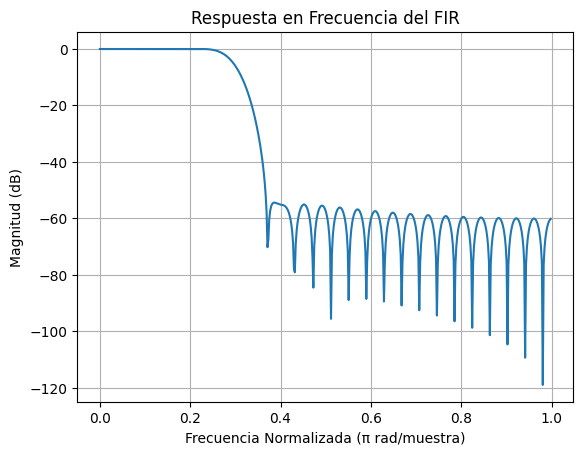

In [ ]:
import numpy as np
from scipy.signal import firwin, lfilter, freqz
import matplotlib.pyplot as plt

# FIR paso bajo de orden 50, frecuencia de corte 0.3 (Nyquist = 1.0)
b = firwin(51, cutoff=0.3)
w, h = freqz(b)

plt.title("Respuesta en Frecuencia del FIR")
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.xlabel('Frecuencia Normalizada (π rad/muestra)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.show()

#📌2. Filtros IIR (Infinite Impulse Response)

🎯 Características:
Su respuesta al impulso es infinita (aunque en la práctica se recorta).

Tienen realimentación, como los filtros analógicos clásicos.

Su implementación sigue una ecuación en diferencias:

$y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k]$

✅ Ventajas:
Mucho más eficientes que los FIR: logran filtros agudos con menos coeficientes.

Simulan filtros analógicos conocidos: Butterworth, Chebyshev, Elliptic.

❌ Desventajas:
Pueden ser inestables si no se diseñan bien.

No siempre tienen fase lineal.

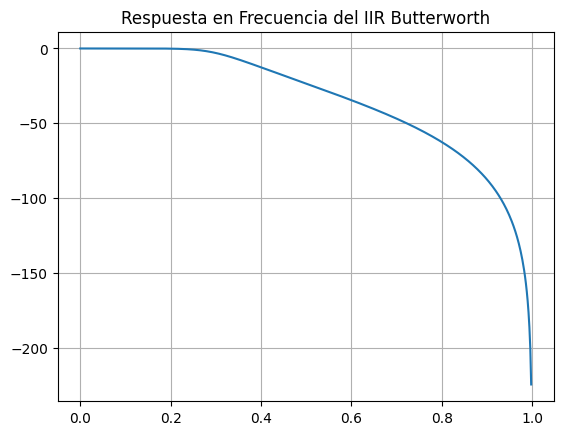

In [ ]:
from scipy.signal import butter

# Orden 4, frecuencia de corte 0.3 (normalizada)
b, a = butter(4, 0.3)
w, h = freqz(b, a)

plt.title("Respuesta en Frecuencia del IIR Butterworth")
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.grid()
plt.show()

🧪 Comparación rápida:


| Propiedad    | FIR                      | IIR                     |
| ------------ | ------------------------ | ----------------------- |
| Respuesta    | Finita                   | Infinita                |
| Estabilidad  | Siempre estable          | Puede ser inestable     |
| Fase lineal  | Sí (si se diseña así)    | Generalmente no         |
| Complejidad  | Mayor (más coeficientes) | Menor (más eficiente)   |
| Aplicaciones | Audio, radar, imágenes   | Comunicaciones, control |

FIR = más fácil, más seguro, pero menos eficiente.

IIR = más potente, pero requiere cuidado (riesgo de inestabilidad).

Ambos son herramientas fundamentales para limpiar, detectar y transformar señales digitales.




#$Transformada \ de  \ Hilbert$
La Transformada de Hilbert es un operador que aplica un desfase de −90° (o
$- \frac{2}{\pi}$
  radianes) a todas las frecuencias positivas de una señal, y de +90° a las negativas.

Matemáticamente se define (en tiempo continuo) como:

$$
\hat{x}(t) = \mathcal{H}\{x(t)\} = \frac{1}{\pi} \, \text{P.V.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} \, d\tau
$$


#🎯 ¿Para qué sirve?
Para construir señales I/Q, clave en modulaciones como QAM, PSK, SSB (Single Side Band).

Para obtener una representación compleja de una señal, lo que facilita:

Detectar la envolvente.

Analizar el contenido de frecuencia.

Separar los componentes positivos y negativos del espectro.

### Interpretación en el Dominio de la Frecuencia

En el dominio de la frecuencia, la transformada de Hilbert equivale a un desplazamiento de fase de -90° para todas las componentes frecuenciales positivas y +90° para las negativas:

$$
\mathcal{F}\{\hat{x}(t)\} = -j \cdot \text{sgn}(f) \cdot \mathcal{F}\{x(t)\}
$$

donde:

$\mathcal{F}$ es la transformada de Fourier,

$\text{sgn}(f)$ es la función signo,

$j$ es la unidad imaginaria.

### Propiedades Clave

**Señal Analítica:** La combinación de la señal original y su transformada de Hilbert forma una señal analítica:

$$
x_a(t) = x(t) + j\hat{x}(t)
$$

Esta señal no tiene componentes de frecuencia negativas.

**Involución:** Aplicar dos veces la transformada de Hilbert devuelve la señal original con signo invertido:

$$
\mathcal{H}\{\mathcal{H}\{x(t)\}\} = -x(t)
$$

**Ortogonalidad:** $x(t)$ y $\hat{x}(t)$ son ortogonales (su producto interno es cero).

### Aplicaciones

**Envolvente de una señal:**

$$
A(t) = \sqrt{x^2(t) + \hat{x}^2(t)}
$$

Fase instantánea:

$$
\phi(t) = \arctan\left(\frac{\hat{x}(t)}{x(t)}\right)
$$

Detección de modulación en amplitud (AM) y frecuencia (FM).

Procesamiento de señales biomédicas (EEG, ECG).

Sistemas de comunicación (SSB - Banda Lateral Única).

### Ejemplo Práctico

Para una señal $x(t) = \cos(\omega t)$, su transformada de Hilbert es:

$$
\hat{x}(t) = \sin(\omega t)
$$

La señal analítica correspondiente sería:

$$
x_a(t) = \cos(\omega t) + j\sin(\omega t) = e^{j\omega t}
$$

# Señal original con su Transformada de Hilbert

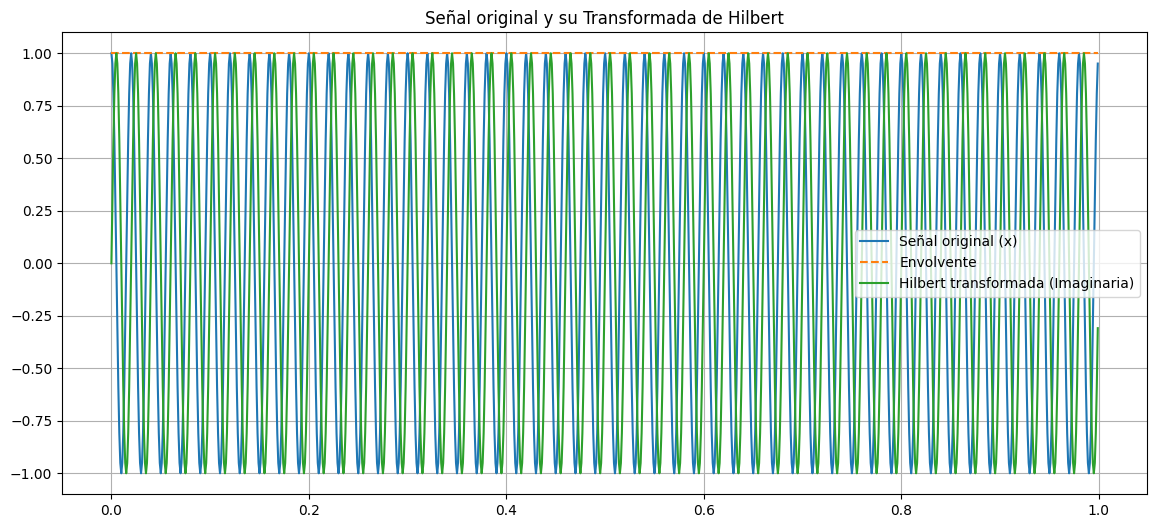

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Señal real
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
x = np.cos(2 * np.pi * 50 * t)

# Transformada de Hilbert
xa = hilbert(x)
envelope = np.abs(xa)
instant_phase = np.angle(xa)

plt.figure(figsize=(14,6))
plt.plot(t, x, label='Señal original (x)')
plt.plot(t, envelope, '--', label='Envolvente')
plt.plot(t, np.imag(xa), label='Hilbert transformada (Imaginaria)')
plt.legend()
plt.title("Señal original y su Transformada de Hilbert")
plt.grid()
plt.show()

# Descomposición visual de la señal

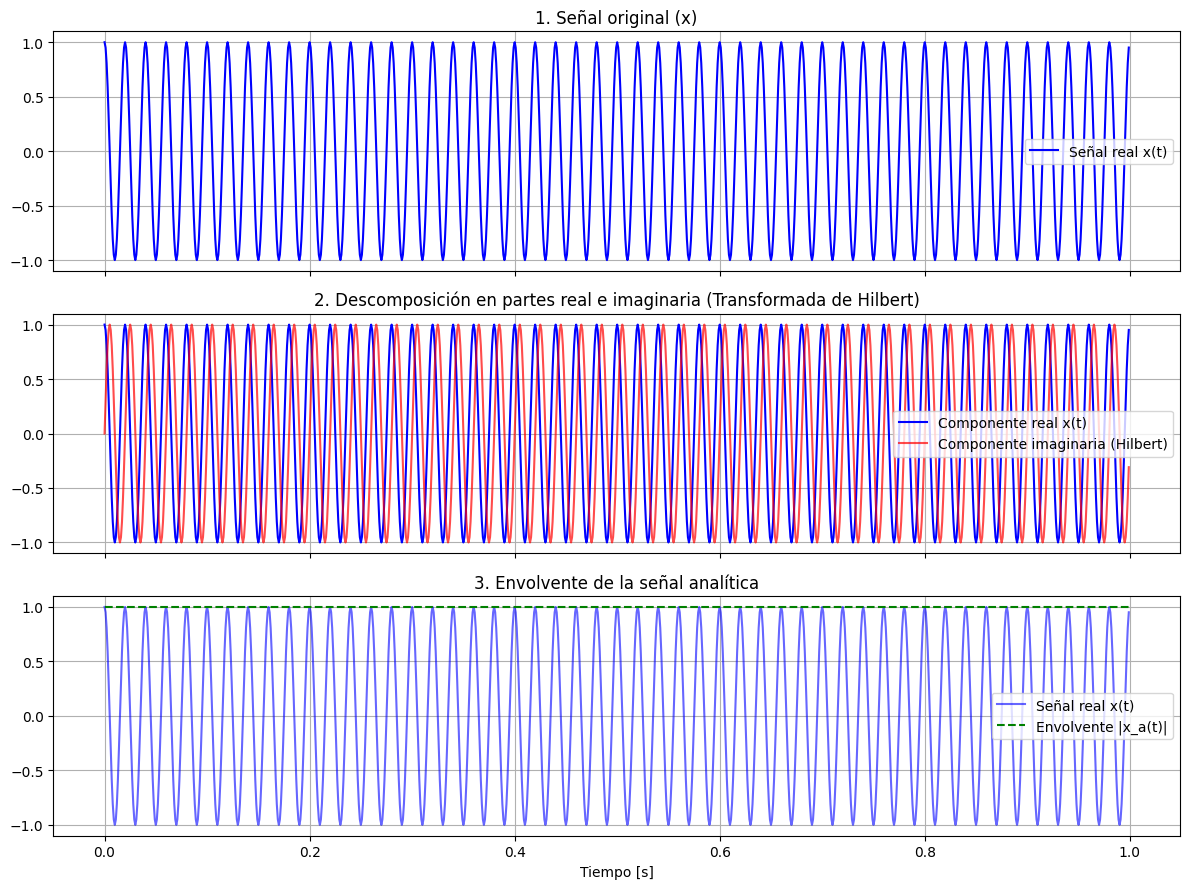

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parámetros
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
f0 = 50  # frecuencia de la señal
x = np.cos(2 * np.pi * f0 * t)  # señal original real

# Transformada de Hilbert
xa = hilbert(x)  # señal analítica
hilb_imag = np.imag(xa)
envelope = np.abs(xa)

# Gráficas
fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# Señal original
axs[0].plot(t, x, label='Señal real x(t)', color='blue')
axs[0].set_title('1. Señal original (x)')
axs[0].legend()
axs[0].grid()

# Descomposición: real + imaginaria
axs[1].plot(t, x, label='Componente real x(t)', color='blue')
axs[1].plot(t, hilb_imag, label='Componente imaginaria (Hilbert)', color='red', alpha=0.7)
axs[1].set_title('2. Descomposición en partes real e imaginaria (Transformada de Hilbert)')
axs[1].legend()
axs[1].grid()

# Envolvente
axs[2].plot(t, x, label='Señal real x(t)', color='blue', alpha=0.6)
axs[2].plot(t, envelope, '--', label='Envolvente |x_a(t)|', color='green')
axs[2].set_title('3. Envolvente de la señal analítica')
axs[2].legend()
axs[2].grid()

plt.xlabel("Tiempo [s]")
plt.tight_layout()
plt.show()


# Señales en Fase (I) y Cuadratura (Q)

Las señales **I (In-phase)** y **Q (Quadrature)** son componentes ortogonales usadas para representar señales moduladas en banda base. Surgen de la representación analítica de una señal pasabanda mediante la Transformada de Hilbert:

### Señal pasabanda real:
$x(t) = A(t)\cos(2\pi f_c t + \phi(t))$
donde:
- $A(t)$ es la envolvente,
- $phi(t)$ es la fase instantánea,
- $f_c$ es la frecuencia portadora.

### Representación I/Q:

$x(t) = I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)$

donde:
- **Componente en fase (I)**:

  $I(t) = A(t)\cos\phi(t)$
  
- **Componente en cuadratura (Q)**:
  
  $Q(t) = A(t)\sin\phi(t)$
  

### Señal analítica:

$x_a(t) = I(t) + jQ(t) = A(t)e^{j\phi(t)}$

*(Obtenida mediante la Transformada de Hilbert)*.

#🎯 ¿Para qué sirve la modulación I/Q?
Permite modular múltiples bits por símbolo, usando amplitud + fase.


- Hace posible modulaciones eficientes como QAM, PSK, OFDM, que se usan en Wi-Fi, 4G/5G, Bluetooth, etc.

- Facilita la demodulación digital: los receptores modernos trabajan en el dominio I/Q.

- Permite representar señales complejas de banda base, ideales para simulación.

#🎲 ¿Qué es la modulación QAM (Quadrature Amplitude Modulation)?
La QAM es una modulación que combina:

- Modulación en amplitud (como en AM),

- Modulación en fase (como en PSK),
usando las señales I y Q.

- Cada símbolo QAM representa un par de valores (I, Q) → un punto en un plano 2D llamado diagrama de constelación.

# Relación entre QAM y la Transformada de Hilbert
**Generación de señales I/Q**:

 La Transformada de Hilbert permite obtener la componente en cuadratura ($Q(t)$) a partir de $I(t)$.

**Demodulación coherente:**

Para recuperar $I(t)$ y $Q(t)$ en el receptor, se usa un oscilador local y la propiedad de ortogonalidad.

**Proceso de demodulación:**

1. Multiplicar la señal recibida por $\cos(2\pi f_c t)$ y $\sin(2\pi f_c t)$.
2. Filtrar las componentes de alta frecuencia para obtener $I(t)$ y $Q(t)$.

#🔢 Ejemplo: 16-QAM
- 4 bits por símbolo (2 bits para I, 2 bits para Q)

- Conjuga 16 puntos en el plano I-Q

- Cada punto tiene coordenadas como (±1, ±1), (±3, ±3)…

📈 ¡Esto permite enviar más bits por segundo sin aumentar el ancho de banda!
(pero sí requiere mejor SNR — o sea, más potencia o menos ruido)

- Generación de señales I/Q:

La Transformada de Hilbert permite obtener la componente en cuadratura ($Q(t)$) a partir de $I(t)$.

- Demodulación coherente:

Para recuperar $I(t)$ y $Q(t)$ en el receptor, se usa un oscilador local y la propiedad de ortogonalidad.


- Proceso de demodulación:


- Multiplicar la señal recibida por $\cos(2\pi f_c t)$ y $\sin(2\pi f_c t)$.

- Filtrar las componentes de alta frecuencia para obtener $I(t)$ y $Q(t)$.

#Aplicaciones de QAM
- Comunicaciones digitales: Wi-Fi (802.11ac usa 256-QAM), cable módem (64-QAM), TV digital.

- 5G: Emplea QAM adaptativo (hasta 1024-QAM en mmWave).

- Radio definida por software (SDR): Flexibilidad en modulación/demodulación.

| Ventajas                     | Desventajas                         |
| ---------------------------- | ----------------------------------- |
| Alta eficiencia espectral.   | Sensible a ruido y distorsión.      |
| Soporte para altas velocidades.| Requiere sincronización precisa.    |
| Adaptable (modulación adaptable).| Consumo de potencia elevado.      |

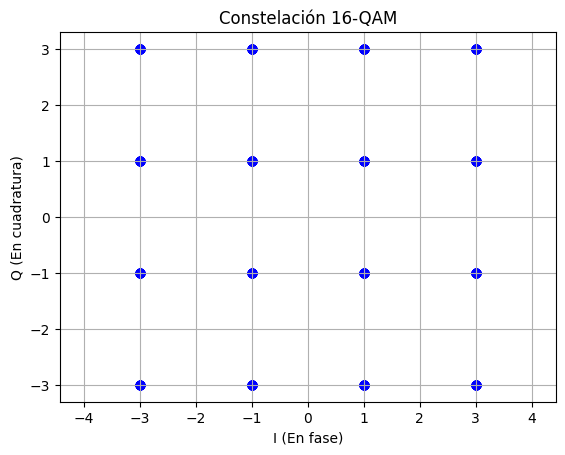

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 1000 símbolos 16-QAM aleatorios
M = 16
bits_por_simbolo = int(np.log2(M))
N = 1000
simbolos = np.random.randint(0, M, N)

# Crear mapa 16-QAM (Gray coding opcional)
# Mapeo simple rectangular 4x4: (−3, −1, +1, +3)
mapa_qam = {
    0: (-3, -3), 1: (-3, -1), 2: (-3, +3), 3: (-3, +1),
    4: (-1, -3), 5: (-1, -1), 6: (-1, +3), 7: (-1, +1),
    8: (+3, -3), 9: (+3, -1),10: (+3, +3),11: (+3, +1),
   12: (+1, -3),13: (+1, -1),14: (+1, +3),15: (+1, +1)
}

# Convertir a señales I y Q
I = np.array([mapa_qam[s][0] for s in simbolos])
Q = np.array([mapa_qam[s][1] for s in simbolos])

# Mostrar diagrama de constelación
plt.scatter(I, Q, color='blue', alpha=0.6)
plt.title("Constelación 16-QAM")
plt.xlabel("I (En fase)")
plt.ylabel("Q (En cuadratura)")
plt.grid(True)
plt.axis('equal')
plt.show()


#📌 ¿Qué es OFDM?
OFDM es una técnica de modulación y multiplexación que divide un canal de transmisión en muchos subcanales más pequeños, cada uno transmitiendo una parte de los datos en frecuencias ortogonales y es la tecnología detrás de Wi-Fi, 4G, 5G, DVB, ADSL, y más.

**En resumen:**
- Transmite muchos símbolos en paralelo, en diferentes frecuencias.

- Cada subcanal es modulado típicamente con QAM o PSK.

- Se usa la Transformada Rápida de Fourier (FFT) para generar y recuperar las señales.

- La ortogonalidad entre portadoras evita que se interfieran entre sí.

#🎯 ¿Por qué se usa OFDM?

**Porque soluciona varios problemas críticos de las comunicaciones inalámbricas:**

| Problema típico             | Cómo lo resuelve OFDM                         |
| --------------------------- | --------------------------------------------- |
| Multitrayectoria (fading)   | Divide en canales estrechos menos sensibles   |
| Interferencia intersimbólica (ISI)| Agrega cyclic prefix para evitarla        |
| Lento procesamiento         | Usa FFT/IFFT para procesar rápido y eficiente |
| Alta tasa de datos          | Transmite muchos bits en paralelo             |

# 🧠 ¿Qué significa "frecuencias ortogonales"?
Aunque las portadoras están muy juntas en frecuencia, se eligen de forma que sean matemáticamente ortogonales entre sí. Esto significa:

$$
\int_{0}^{T} \cos(2\pi f_m t) \cdot \cos(2\pi f_n t) \, dt = 0 \quad \text{si } m \neq n
$$

Esta propiedad permite que las señales no interfieran aunque estén superpuestas en el espectro.


🧱 ¿Cómo funciona OFDM paso a paso?
1. Datos → símbolos QAM

- Se convierten los bits en símbolos QAM.

2. Agrupación de símbolos → subportadoras

- Por ejemplo, 64 símbolos QAM → 64 subportadoras.

3. IFFT

- Se aplica una Transformada Inversa de Fourier para generar la señal OFDM en tiempo.

4. Cyclic Prefix (CP)

- Se copia una parte del final al principio de la señal (esto combate ISI).

5. Transmisión

- Se transmite por el canal como una señal única.

6. Receptor

- El receptor elimina el CP, aplica la FFT, y recupera los símbolos QAM de cada subportadora.

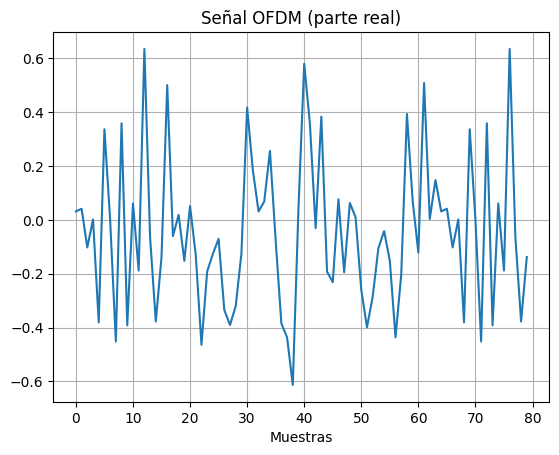

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros OFDM
N = 64  # Número de subportadoras
cp_len = 16  # Longitud del prefijo cíclico
M = 16  # QAM

# Generar símbolos aleatorios (QAM simple)
datos = np.random.randint(0, M, N)
qam_map = {i: (2*(i%4)-3) + 1j*(2*(i//4)-3) for i in range(M)}  # Mapeo QAM 4x4
X = np.array([qam_map[d] for d in datos])

# Señal OFDM (dominio del tiempo)
ofdm_time = np.fft.ifft(X)

# Agregar prefijo cíclico
ofdm_tx = np.concatenate([ofdm_time[-cp_len:], ofdm_time])

# Visualizar parte real
plt.plot(np.real(ofdm_tx))
plt.title("Señal OFDM (parte real)")
plt.xlabel("Muestras")
plt.grid()
plt.show()


#📡 ¿Qué es la comunicación WiFi y 5G?
Ambas son tecnologías de comunicación inalámbrica digital de alta velocidad, pero con diferentes contextos de aplicación:

| Tecnología      | Uso principal   | Rango   | Frecuencia      | Velocidad típica     |
| --------------- | --------------- | ------- | --------------- | --------------------- |
| WiFi            | Redes locales (LAN) | ~50 m   | 2.4 GHz / 5 GHz / 6 GHz | 100 Mbps – 1 Gbps     |
| 5G              | Redes móviles (WAN, IoT)| hasta km | <6 GHz y ondas mm (24+ GHz) | >1 Gbps – 10 Gbps     |


**🧠 Principios básicos comunes**

Ambas usan tecnologías de modulación avanzadas para enviar más datos en menos tiempo y espacio:

1. Multiplexación por División de Frecuencia Ortogonal (OFDM)

✅ Divide el ancho de banda en subportadoras ortogonales.

✅ Cada subportadora usa modulación QAM.

✅ Se genera usando IFFT y se recupera con FFT.

2. Modulación QAM (4-QAM, 16-QAM, 64-QAM, 256-QAM, hasta 1024-QAM en 5G)

✅ Cada símbolo transmite más bits.

✅ Más complejidad = más eficiencia espectral, pero requiere mejor SNR.



3. Señales I/Q y Hilbert

✅ Tanto transmisores como receptores trabajan en banda base compleja:

$$
s(t) = I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)
$$
✅ Se usan bloques DSP (software o hardware) para:

- Generar I/Q a partir de bits.

- Modulación QAM.

- Aplicar transformada de Hilbert.

- Demodular y recuperar los datos.



4. Transformada de Fourier / FFT

✅ Se usa para:

- Crear señales OFDM (IFFT)

- Analizar el espectro

- Filtrar y mitigar interferencia

📜 Protocolos y estándares

📶 WiFi (IEEE 802.11)

| Versión           | Año  | Frecuencia      | Máx. QAM | Máx. velocidad |
| ----------------- | ---- | --------------- | -------- | -------------- |
| 802.11a           | 1999 | 5 GHz           | OFDM + 64-QAM | \~54 MPS     |
| 802.11g           | 2003 | 2.4 GHz         | OFDM + 64-QAM | \~54 MPS      |
| 802.11n (WiFi 4)  | 2009 | 2.4 / 5 GHz     | 64-QAM        | \~600 Mbps   |
| 802.11ac (WiFi 5) | 2014 | 5 GHz           | 256-QAM       | \~1.7 Gbps   |
| 802.11ax (WiFi 6) | 2019 | 2.4 / 5 / 6 GHz | 1024-QAM      | \~10 Gbps    |


📱 5G NR (New Radio – 3GPP)

| Modo  | Aplicación                   | QAM          | Tecnología clave    |
| ----- | ---------------------------- | ------------ | ------------------- |
| eMBB  | Videos 4K, realidad virtual  | 256–1024-QAM | OFDM + Massive MIMO |
| URLLC | Control industrial, robótica | 64-QAM       | baja latencia       |
| mMTC  | IoT, sensores                | BPSK, QPSK   | robustez            |


Características:

- OFDM (tanto en enlace descendente como ascendente)

- Subportadoras hasta 4096 (FFT de tamaño 4096)

- QAM adaptable según la calidad del canal

- En 5G usamos scalable OFDM: adaptamos el espaciado entre subportadoras según el entorno (rural vs urbano vs indoor)

##Simulación básica OFDM + QAM (64 subportadoras)

🔷 1. Configuración Inicial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy import signal
import random

# Parámetros del sistema
N = 64                  # Número de subportadoras OFDM
CP = 16                 # Prefijo cíclico (evita ISI)
QAM_ORDER = 16          # Orden de modulación QAM (4, 16, 64, etc.)
SNR_dB = 20             # Relación señal-ruido (dB)

🔷 2. Generación de Datos y Modulación QAM

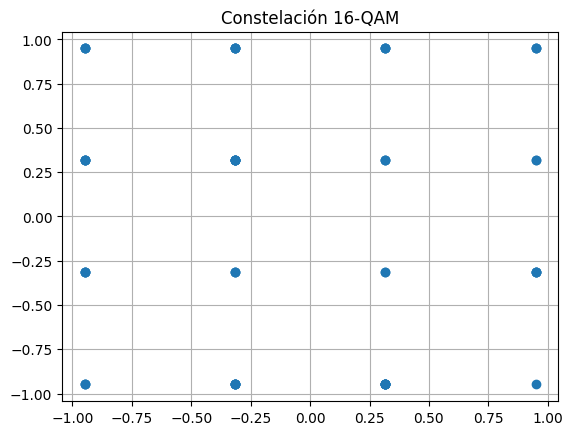

In [ ]:
# Generación de bits aleatorios
bits_per_symbol = int(np.log2(QAM_ORDER))
num_symbols = N
bits = np.random.randint(0, 2, num_symbols * bits_per_symbol)

# Mapeo a símbolos QAM (ejemplo para 16-QAM)
def qam_modulation(bits, order):
    bit_groups = np.reshape(bits, (-1, int(np.log2(order))))
    symbols = []
    for group in bit_groups:
        # Ejemplo simplificado: 16-QAM con constelación normalizada
        i = 2 * (group[0] + 2 * group[1]) - 3
        q = 2 * (group[2] + 2 * group[3]) - 3
        symbols.append(i + 1j * q)
    return np.array(symbols) / np.sqrt(10)  # Normalización de energía

symbols = qam_modulation(bits, QAM_ORDER)

# Diagrama de constelación
plt.scatter(np.real(symbols), np.imag(symbols))
plt.title(f"Constelación {QAM_ORDER}-QAM")
plt.grid()
plt.show()

🔷 3. Modulación OFDM (IFFT + Prefijo Cíclico)

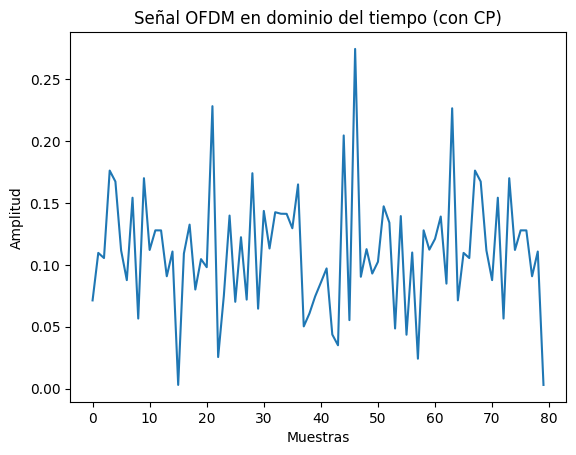

In [ ]:
# Asignación de símbolos a subportadoras OFDM
ofdm_symbol = np.zeros(N, dtype=complex)
ofdm_symbol[:len(symbols)] = symbols

# Transformada inversa (IFFT) para pasar a dominio del tiempo
time_signal = ifft(ofdm_symbol)

# Añadir prefijo cíclico (CP)
cp = time_signal[-CP:]  # Tomar las últimas muestras
ofdm_signal_with_cp = np.concatenate([cp, time_signal])

# Visualización de la señal OFDM en tiempo
plt.plot(np.abs(ofdm_signal_with_cp))
plt.title("Señal OFDM en dominio del tiempo (con CP)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()

🔷 4. Simulación del Canal (Ruido AWGN)

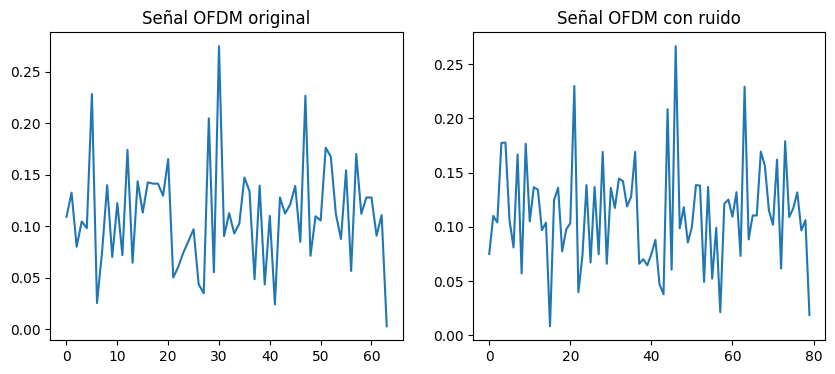

In [ ]:
# Añadir ruido gaussiano (AWGN)
def add_awgn(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / (10 ** (snr_db / 10))
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

received_signal = add_awgn(ofdm_signal_with_cp, SNR_dB)

# Visualización antes/después del canal
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.abs(time_signal))
plt.title("Señal OFDM original")
plt.subplot(1, 2, 2)
plt.plot(np.abs(received_signal))
plt.title("Señal OFDM con ruido")
plt.show()

🔷 5. Recepción y Demodulación (FFT + QAM)

In [ ]:
# Remover prefijo cíclico y aplicar FFT
received_signal_no_cp = received_signal[CP:CP+N]
received_symbols = fft(received_signal_no_cp)

# Demodulación QAM (decisión por mínima distancia)
def qam_demodulation(symbols, order):
    # Constelación de referencia (ejemplo para 16-QAM)
    constellation = {
        0: (-3-3j), 1: (-3-1j), 2: (-3+3j), 3: (-3+1j),
        4: (-1-3j), 5: (-1-1j), 6: (-1+3j), 7: (-1+1j),
        8: (3-3j),  9: (3-1j), 10: (3+3j), 11: (3+1j),
        12: (1-3j), 13: (1-1j), 14: (1+3j), 15: (1+1j)
    }
    constellation = {k: v/np.sqrt(10) for k, v in constellation.items()}  # Normalización

    decoded_bits = []
    for sym in symbols:
        # Encontrar el símbolo más cercano en la constelación
        distances = [np.abs(sym - point) for point in constellation.values()]
        closest_idx = np.argmin(distances)
        decoded_bits.extend([int(b) for b in format(closest_idx, f'0{int(np.log2(order))}b')])
    return np.array(decoded_bits)

decoded_bits = qam_demodulation(received_symbols[:len(symbols)], QAM_ORDER)

# Calcular tasa de error (BER)
ber = np.sum(np.abs(bits - decoded_bits)) / len(bits)
print(f"BER (Tasa de Error de Bits): {ber:.4f}")

BER (Tasa de Error de Bits): 0.5000


🔷 6. Diagrama de Bloques Completo (Resumen)
python


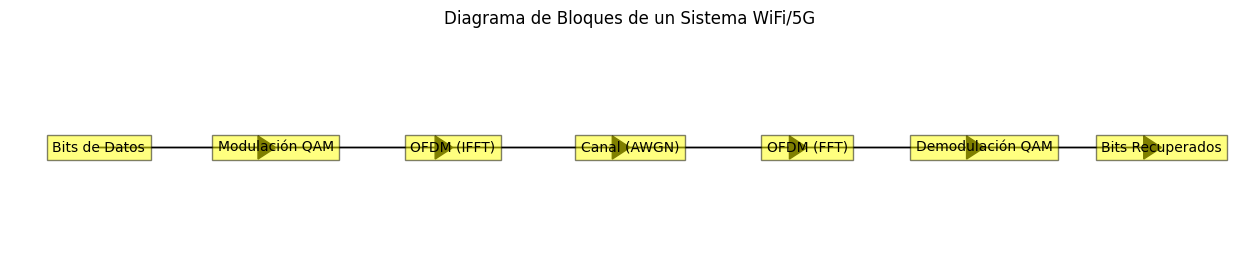

In [ ]:
# Visualización esquemática
stages = [
    "Bits de Datos", "Modulación QAM", "OFDM (IFFT)",
    "Canal (AWGN)", "OFDM (FFT)", "Demodulación QAM", "Bits Recuperados"
]

plt.figure(figsize=(16, 3))
for i, stage in enumerate(stages):
    plt.text(i, 0, stage, ha='center', va='center', bbox=dict(facecolor='yellow', alpha=0.5))
    if i < len(stages)-1:
        plt.arrow(i, 0, 0.9, 0, head_width=0.2, head_length=0.1, fc='k')
plt.xlim(-0.5, len(stages)-0.5)
plt.ylim(-1, 1)
plt.axis('off')
plt.title("Diagrama de Bloques de un Sistema WiFi/5G")
plt.show()


**Este código simula todas las etapas clave de un sistema WiFi/5G:**

1️⃣ Modulación QAM (para eficiencia espectral).

2️⃣ OFDM (para combatir multitrayecto).

3️⃣ Canal con ruido (AWGN).

4️⃣ Demodulación y recuperación de datos.

#Desarollo de Dashboard en Streamlit.


## Primero instalamos las librerías necesarias

In [ ]:
#instalación de librerías
!pip install streamlit -q
# !pip install numpy matplotlib scipy pandas

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz -q
#Libreria para manipulacion de archivos de audio
!pip install soundfile -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install browser-cookie3

In [ ]:
!apt install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## Creamos la carpeta donde se van a guardar las páginas

In [ ]:
import os

output_path = '/content/modelos/modelo.pkl'

# Crear la carpeta 'modelos' si no existe
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
import os

# Verificar los archivos dentro de la carpeta 'modelos'
os.listdir('/content/modelos/')

[]

In [ ]:
!mkdir pages

mkdir: cannot create directory ‘pages’: File exists


## Creamos el Home del dashboard

In [ ]:
%%writefile 0_Home.py

import streamlit as st

st.set_page_config(
    page_title="Proyecto Final",
    page_icon="🎓​",
)

st.title("🎓 De Fourier al Wifi/5G")

st.markdown(
    """
    ¡🫀 Anatomía de una señal inalambrica 📈!

    ### Lo que veremos:
    * 📊 Dominio de la Frecuencia
    * 🔄 Construcción de las Señales I/Q
    * 📡 Modulación QAM
    * 🌪️ Canal con Ruido (AWGN)
    * 🔍 Demodulación y Recepción

    ---
    Puedes seleccionar una de las páginas desde el menú lateral izquierdo para comenzar.
    """
)

Overwriting 0_Home.py


## Primera página: Dominio de la frecuencia

In [ ]:
%%writefile pages/1_Dominio_de_la_frecuencia.py
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from scipy.signal import firwin, lfilter, freqz
from scipy.fft import fft, fftfreq

# Título del módulo
st.title("1. Dominio del Tiempo y Frecuencia")


# Descripción
st.markdown("### Descripción:")
st.write("En éste módulo se muestra una señal sintética en el dominio del tiempo y su espectro de frecuencias. Se aplica un filtro FIR paso-bajo con frecuencia de corte ajustable junto con su diagrama de Bode (magnitud y fase).")

# Parámetros interactivos
fs = st.slider("Frecuencia de muestreo (Hz)", 100, 2000, 500)
f_signal = st.slider("Frecuencia de la señal (Hz)", 1, 200, 50)
duration = st.slider("Duración de la señal (s)", 0.1, 5.0, 1.0)
cutoff = st.slider("Frecuencia de corte del filtro (Hz)", 1, 200, 100)
signal_type = st.selectbox("Tipo de señal", ["Seno", "Cuadrada", "Triangular"])

# Generar señal de ejemplo
t = np.arange(0, duration, 1/fs)
if signal_type == "Seno":
    signal = np.sin(2 * np.pi * f_signal * t)
elif signal_type == "Cuadrada":
    signal = np.sign(np.sin(2 * np.pi * f_signal * t))
elif signal_type == "Triangular":
    signal = 2 * np.abs(2 * ((f_signal * t) % 1) - 1) - 1

# Aplicar FFT
N = len(signal)
y_fft = fft(signal)
xf = fftfreq(N, 1/fs)[:N//2]

# Diseñar filtro FIR paso-bajo
numtaps = 64
taps = firwin(numtaps, cutoff=cutoff, fs=fs)
filtered_signal = lfilter(taps, 1.0, signal)

# Respuesta en frecuencia del filtro (Diagrama de Bode)
w, h = freqz(taps, worN=8000)
freq_response = w * fs / (2 * np.pi)

# Gráficos

# Señal en el dominio del tiempo
st.subheader("Señal en el Dominio del Tiempo")
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original')
ax.plot(t, filtered_signal, label='Filtrada')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid(True)
st.pyplot(fig)

# Espectro de frecuencias
st.subheader("Espectro de Frecuencias")
fig2, ax2 = plt.subplots()
ax2.plot(xf, 2.0/N * np.abs(y_fft[:N//2]), label='Original')
ax2.plot(xf, 2.0/N * np.abs(fft(filtered_signal)[:N//2]), label='Filtrada')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Magnitud')
ax2.grid(True)
ax2.legend()
st.pyplot(fig2)

# Diagrama de Bode del filtro
st.subheader("Diagrama de Bode del Filtro Paso-Bajo")
fig3, (ax3_mag, ax3_phase) = plt.subplots(2, 1, figsize=(8, 6))

# Magnitud
ax3_mag.plot(freq_response, 20 * np.log10(np.abs(h)), 'b')
ax3_mag.set_title('Magnitud')
ax3_mag.set_ylabel('Amplitud [dB]')
ax3_mag.grid(True)

# Fase
ax3_phase.plot(freq_response, np.unwrap(np.angle(h)) * 180 / np.pi, 'g')
ax3_phase.set_title('Fase')
ax3_phase.set_xlabel('Frecuencia [Hz]')
ax3_phase.set_ylabel('Fase [grados]')
ax3_phase.grid(True)

plt.tight_layout()
st.pyplot(fig3)

Overwriting pages/1_Dominio_de_la_frecuencia.py


## Segunda página: Construcción de las señales

In [ ]:
%%writefile pages/2_Construcción_de_las_Señales.py
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq

# Título del módulo
st.title("2. Construcción de las Señales I/Q")

# Descripción
st.markdown("### Descripción:")
st.write("Aqui se muestra cómo se generan las señales en fase (I) y cuadratura (Q) usando la Transformada de Hilbert. Se visualiza el desfase de 90° entre ambas componentes, su representación en el plano IQ, la envolvente y la fase instantánea.")

# Parámetros interactivos
fs = st.slider("Frecuencia de muestreo (Hz)", 100, 2000, 500)
f_signal = st.slider("Frecuencia de la señal (Hz)", 1, 200, 50)
duration = st.slider("Duración de la señal (s)", 0.1, 5.0, 1.0)
signal_type = st.selectbox("Tipo de señal", ["Seno", "Cuadrada", "Triangular"])

# Generar señal de ejemplo
t = np.arange(0, duration, 1/fs)
if signal_type == "Seno":
    signal_i = np.sin(2 * np.pi * f_signal * t)
elif signal_type == "Cuadrada":
    signal_i = np.sign(np.sin(2 * np.pi * f_signal * t))
elif signal_type == "Triangular":
    signal_i = 2 * np.abs(2 * ((f_signal * t) % 1) - 1) - 1

# Aplicar Transformada de Hilbert para obtener Q
signal_q = np.imag(hilbert(signal_i))

# Señal analítica
analytic_signal = signal_i + 1j * signal_q

# Envolvente
envelope = np.abs(analytic_signal)

# Fase instantánea
instant_phase = np.unwrap(np.angle(analytic_signal))

# Gráficos

# Señales I y Q en el dominio del tiempo
st.subheader("Señales en Fase (I) y Cuadratura (Q)")
fig, ax = plt.subplots()
ax.plot(t, signal_i, label='Componente I (En fase)')
ax.plot(t, signal_q, label='Componente Q (En cuadratura)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid(True)
st.pyplot(fig)

# Diagrama del plano IQ
st.subheader("Plano IQ (Componentes I y Q)")
fig2, ax2 = plt.subplots()
ax2.plot(signal_i, signal_q, lw=1.5)
ax2.scatter(signal_i[::10], signal_q[::10], c='r', s=20)  # Puntos destacados
ax2.set_xlabel('Componente I')
ax2.set_ylabel('Componente Q')
ax2.set_title('Diagrama I-Q')
ax2.grid(True)
ax2.axis('equal')
st.pyplot(fig2)

# Envolvente y fase instantánea
st.subheader("Envolvente y Fase Instantánea")
fig3, (ax3_env, ax3_phase) = plt.subplots(2, 1, figsize=(10, 6))
ax3_env.plot(t, envelope, 'g')
ax3_env.set_title('Envolvente')
ax3_env.grid(True)

ax3_phase.plot(t, instant_phase, 'm')
ax3_phase.set_title('Fase Instantánea')
ax3_phase.grid(True)

plt.tight_layout()
st.pyplot(fig3)

Overwriting pages/2_Construcción_de_las_Señales.py


## Tercera página: Modulación QAM

In [ ]:
%%writefile pages/3_Modulación_QAM.py
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from scipy.fft import fft, fftfreq

# Título del módulo
st.title("3. Modulación QAM")

# Descripción

# Parámetros interactivos
qam_order = st.selectbox("Orden de QAM", [4, 16, 64])
num_symbols = st.slider("Número de símbolos", 10, 1000, 100)
fs = st.slider("Frecuencia de muestreo (Hz)", 100, 2000, 500)
fc = st.slider("Frecuencia de la portadora (Hz)", 10, 500, 100)
show_constellation = st.checkbox("Mostrar constelación", value=True)
show_time_domain = st.checkbox("Mostrar señal en tiempo", value=True)
show_freq_domain = st.checkbox("Mostrar espectro de frecuencias", value=True)

st.markdown("### Descripción:")
st.write(f"Aqui mostramos una modulación {qam_order}-QAM. Se generan símbolos aleatorios y se representan en el plano IQ (constelación). Luego, se modulan sobre una portadora de {fc} Hz y se visualizan en el dominio del tiempo y de la frecuencia.")

# Mapeo de constelación QAM
def generate_qam_symbols(order, num_symbols):
    bits_per_symbol = int(np.log2(order))
    bits = np.random.randint(0, 2, num_symbols * bits_per_symbol)

    # Mapeo Gray para 16-QAM (puedes expandirlo para 64-QAM)
    if order == 4:
        i = 2 * bits[::2] - 1
        q = 2 * bits[1::2] - 1
    elif order == 16:
        i = 2 * (bits[::4] * 2 + bits[1::4]) - 3
        q = 2 * (bits[2::4] * 2 + bits[3::4]) - 3
        i = np.where(i == -3, -1, np.where(i == -1, -3, np.where(i == 1, 3, 1)))
        q = np.where(q == -3, -1, np.where(q == -1, -3, np.where(q == 1, 3, 1)))
    elif order == 64:
        i = 2 * (bits[::6] * 4 + bits[1::6] * 2 + bits[2::6]) - 7
        q = 2 * (bits[3::6] * 4 + bits[4::6] * 2 + bits[5::6]) - 7
    else:
        raise ValueError("Orden de QAM no soportado")

    symbols = i + 1j * q
    return symbols / np.sqrt(np.var(symbols))  # Normalización de energía

# Generar símbolos QAM
symbols = generate_qam_symbols(qam_order, num_symbols)

# Señal QAM modulada
t = np.arange(len(symbols)) / fs
I = np.real(symbols)
Q = np.imag(symbols)

# Señal modulada en tiempo
carrier = np.cos(2 * np.pi * fc * t)
modulated = I * np.cos(2 * np.pi * fc * t) - Q * np.sin(2 * np.pi * fc * t)

# FFT de la señal modulada
N = len(modulated)
y_fft = fft(modulated)
xf = fftfreq(N, 1/fs)[:N//2]

# Gráficos

# Diagrama de constelación
if show_constellation:
    st.subheader(f"Diagrama de Constelación {qam_order}-QAM")
    fig, ax = plt.subplots()
    ax.scatter(np.real(symbols), np.imag(symbols), c='b', label='Símbolos')
    ax.set_xlabel('Componente I')
    ax.set_ylabel('Componente Q')
    ax.set_title(f'{qam_order}-QAM Constellation')
    ax.grid(True)
    ax.axis('equal')
    st.pyplot(fig)

# Señal QAM en el dominio del tiempo
if show_time_domain:
    st.subheader("Señal QAM en el Dominio del Tiempo")
    fig2, ax2 = plt.subplots()
    ax2.plot(t, modulated, label='Señal QAM')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Amplitud')
    ax2.legend()
    ax2.grid(True)
    st.pyplot(fig2)

# Espectro de frecuencias
if show_freq_domain:
    st.subheader("Espectro de Frecuencias de la Señal QAM")
    fig3, ax3 = plt.subplots()
    ax3.plot(xf, 2.0/N * np.abs(y_fft[:N//2]), label='Magnitud')
    ax3.set_xlabel('Frecuencia (Hz)')
    ax3.set_ylabel('Magnitud')
    ax3.grid(True)
    ax3.legend()
    st.pyplot(fig3)

Overwriting pages/3_Modulación_QAM.py


## Cuarta página: Canal con Ruido (AWGN)

In [ ]:
%%writefile pages/4_Canal_con_ruido.py
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from scipy.fft import fft, ifft
from scipy import signal

# Título del módulo
st.title("4. Canal con Ruido (AWGN)")

# Parámetros interactivos
qam_order = st.selectbox("Orden de QAM", [4, 16, 64])
snr_db = st.slider("SNR (dB)", 0, 30, 10)
num_symbols = st.slider("Número de símbolos", 10, 500, 100)
show_constellation = st.checkbox("Mostrar constelación original vs. ruidosa", value=True)
show_time_domain = st.checkbox("Mostrar señal en tiempo", value=True)
show_fft = st.checkbox("Mostrar espectro de frecuencias", value=True)

# Descripción
st.markdown("### Descripción:")
st.write(f"Este módulo simula un canal con ruido blanco gaussiano aditivo (AWGN). Se genera una constelación {qam_order}-QAM y se le añade ruido con un nivel de SNR ajustable. Se muestran las diferencias entre la señal original y la recibida, tanto en el dominio del tiempo como en la constelación.")

# Mapeo de constelación QAM
def generate_qam_symbols(order, num_symbols):
    bits_per_symbol = int(np.log2(order))
    bits = np.random.randint(0, 2, num_symbols * bits_per_symbol)

    # Mapeo Gray para 16-QAM (puedes expandirlo para 64-QAM)
    if order == 4:
        i = 2 * bits[::2] - 1
        q = 2 * bits[1::2] - 1
    elif order == 16:
        i = 2 * (bits[::4] * 2 + bits[1::4]) - 3
        q = 2 * (bits[2::4] * 2 + bits[3::4]) - 3
        i = np.where(i == -3, -1, np.where(i == -1, -3, np.where(i == 1, 3, 1)))
        q = np.where(q == -3, -1, np.where(q == -1, -3, np.where(q == 1, 3, 1)))
    elif order == 64:
        i = 2 * (bits[::6] * 4 + bits[1::6] * 2 + bits[2::6]) - 7
        q = 2 * (bits[3::6] * 4 + bits[4::6] * 2 + bits[5::6]) - 7
    else:
        raise ValueError("Orden de QAM no soportado")

    symbols = i + 1j * q
    return symbols / np.sqrt(np.var(symbols))  # Normalización de energía

# Generar símbolos QAM
symbols = generate_qam_symbols(qam_order, num_symbols)

# Aplicar FFT
N = len(symbols)
y_fft = fft(symbols)
xf = np.fft.fftfreq(N, 1/N)

# Función para añadir AWGN
def add_awgn(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / (10 ** (snr_db / 10))
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Añadir ruido
noisy_symbols = add_awgn(symbols, snr_db)

# Gráficos

# Diagrama de constelación
if show_constellation:
    st.subheader(f"Constelación {qam_order}-QAM con y sin ruido")
    fig, ax = plt.subplots()
    ax.scatter(np.real(symbols), np.imag(symbols), c='b', label='Original', alpha=0.8)
    ax.scatter(np.real(noisy_symbols), np.imag(noisy_symbols), c='r', label='Con ruido', alpha=0.5, s=20)
    ax.set_xlabel('Componente I')
    ax.set_ylabel('Componente Q')
    ax.set_title(f'{qam_order}-QAM: Original vs. Ruidosa (SNR={snr_db} dB)')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    st.pyplot(fig)

# Señal en el dominio del tiempo
if show_time_domain:
    st.subheader("Señal en el Dominio del Tiempo")
    fig2, ax2 = plt.subplots()
    t = np.arange(len(symbols))
    ax2.plot(t, np.real(symbols), label='Señal real (original)', c='b')
    ax2.plot(t, np.imag(symbols), label='Señal imaginaria (original)', c='g')
    ax2.plot(t, np.real(noisy_symbols), label='Señal real (con ruido)', c='r', linestyle='--')
    ax2.plot(t, np.imag(noisy_symbols), label='Señal imaginaria (con ruido)', c='m', linestyle='--')
    ax2.set_xlabel('Muestras')
    ax2.set_ylabel('Amplitud')
    ax2.legend()
    ax2.grid(True)
    st.pyplot(fig2)

# Espectro de frecuencias
if show_fft:
    st.subheader("Espectro de Frecuencias")
    fig3, ax3 = plt.subplots()
    ax3.plot(xf[:N//2], 2.0/N * np.abs(y_fft[:N//2]), label='Original')
    ax3.plot(xf[:N//2], 2.0/N * np.abs(fft(noisy_symbols)[:N//2]), label='Con ruido')
    ax3.set_xlabel('Frecuencia (Hz)')
    ax3.set_ylabel('Magnitud')
    ax3.grid()
    ax3.legend()
    st.pyplot(fig3)

Overwriting pages/4_Canal_con_ruido.py


## Quinta página: Demodulación y Recepción

In [ ]:
%%writefile pages/5_Demodulación_y_Recepción.py
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from scipy.fft import fft, ifft
from scipy.signal import hilbert

# Título del módulo
st.title("5. Demodulación y Recepción")

# Parámetros interactivos
qam_order = st.selectbox("Orden de QAM", [4, 16, 64])
snr_db = st.slider("SNR (dB)", 0, 30, 10)
num_symbols = st.slider("Número de símbolos", 10, 500, 100)
show_constellation = st.checkbox("Mostrar constelación original vs. demodulada", value=True)
show_ber = st.checkbox("Mostrar tasa de error de bits (BER)", value=True)

st.markdown("### Descripción:")
st.write(f"Este módulo simula la demodulación coherente de una señal {qam_order}-QAM. Se muestra la constelación original y la recibida, afectada por ruido gaussiano. Además, se calcula la tasa de error de bits (BER), que indica cuántos bits se recibieron incorrectamente debido al ruido.")

# Mapeo de constelación QAM
def generate_qam_symbols(order, num_symbols):
    bits_per_symbol = int(np.log2(order))
    bits = np.random.randint(0, 2, num_symbols * bits_per_symbol)

    if order == 4:
        i = 2 * bits[::2] - 1
        q = 2 * bits[1::2] - 1
    elif order == 16:
        i = 2 * (bits[::4] * 2 + bits[1::4]) - 3
        q = 2 * (bits[2::4] * 2 + bits[3::4]) - 3
        i = np.where(i == -3, -1, np.where(i == -1, -3, np.where(i == 1, 3, 1)))
        q = np.where(q == -3, -1, np.where(q == -1, -3, np.where(q == 1, 3, 1)))
    elif order == 64:
        i = 2 * (bits[::6] * 4 + bits[1::6] * 2 + bits[2::6]) - 7
        q = 2 * (bits[3::6] * 4 + bits[4::6] * 2 + bits[5::6]) - 7
    else:
        raise ValueError("Orden de QAM no soportado")

    symbols = i + 1j * q
    return symbols / np.sqrt(np.var(symbols)), bits  # Normalización de energía

# Función para añadir AWGN
def add_awgn(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / (10 ** (snr_db / 10))
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para demodular QAM
def demodulate_qam(received, order):
    if order == 4:
        i_demod = np.sign(np.real(received))
        q_demod = np.sign(np.imag(received))
        bits = np.zeros(2 * len(received), dtype=int)
        bits[::2] = (i_demod + 1) // 2
        bits[1::2] = (q_demod + 1) // 2
    elif order == 16:
        i_demod = np.round((np.real(received) + 3) / 2).astype(int)
        q_demod = np.round((np.imag(received) + 3) / 2).astype(int)
        i_demod = np.clip(i_demod, 0, 3)
        q_demod = np.clip(q_demod, 0, 3)
        bits = np.zeros(4 * len(received), dtype=int)
        bits[::4] = (i_demod // 2).astype(int)
        bits[1::4] = (i_demod % 2).astype(int)
        bits[2::4] = (q_demod // 2).astype(int)
        bits[3::4] = (q_demod % 2).astype(int)
    elif order == 64:
        i_demod = np.round((np.real(received) + 7) / 2).astype(int)
        q_demod = np.round((np.imag(received) + 7) / 2).astype(int)
        i_demod = np.clip(i_demod, 0, 7)
        q_demod = np.clip(q_demod, 0, 7)
        bits = np.zeros(6 * len(received), dtype=int)
        bits[::6] = (i_demod // 4).astype(int)
        bits[1::6] = ((i_demod // 2) % 2).astype(int)
        bits[2::6] = (i_demod % 2).astype(int)
        bits[3::6] = (q_demod // 4).astype(int)
        bits[4::6] = ((q_demod // 2) % 2).astype(int)
        bits[5::6] = (q_demod % 2).astype(int)
    return bits

# Generar símbolos QAM
transmitted_symbols, original_bits = generate_qam_symbols(qam_order, num_symbols)

# Añadir ruido
received_symbols = add_awgn(transmitted_symbols, snr_db)

# Demodular
received_bits = demodulate_qam(received_symbols, qam_order)

# Calcular BER
ber = np.sum(original_bits != received_bits) / len(original_bits)

# Gráficos

# Diagrama de constelación
if show_constellation:
    st.subheader(f"Constelación {qam_order}-QAM: Original vs. Demodulada")
    fig, ax = plt.subplots()
    ax.scatter(np.real(transmitted_symbols), np.imag(transmitted_symbols), c='b', label='Original', alpha=0.8)
    ax.scatter(np.real(received_symbols), np.imag(received_symbols), c='r', label='Demodulada', alpha=0.5, s=20)
    ax.set_xlabel('Componente I')
    ax.set_ylabel('Componente Q')
    ax.set_title(f'{qam_order}-QAM: Original vs. Demodulada (SNR={snr_db} dB)')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    st.pyplot(fig)

# Mostrar BER
if show_ber:
    st.subheader("Tasa de Error de Bits (BER)")
    st.metric(label="BER", value=f"{ber:.4f}")

# Comparación de bits
st.subheader("Comparación de Bits: Original vs. Recuperado")
comparison = np.array([original_bits[:20], received_bits[:20]]).T
st.table(comparison.astype(int))
st.caption("Se muestran los primeros 20 bits para comparación visual.")

# Diagrama de bloques del sistema
st.subheader("Diagrama de Bloques del Sistema")
st.markdown("""
1. **Modulación QAM**: Se generan símbolos a partir de bits.
2. **Canal AWGN**: Se añade ruido gaussiano.
3. **Demodulación QAM**: Se recuperan los bits.
""")

# Gráfico esquemático del sistema
stages = [
    "Bits de entrada", "Modulación QAM", "Canal AWGN", "Demodulación QAM", "Bits recuperados"
]
fig2, ax2 = plt.subplots(figsize=(12, 1))
for i, stage in enumerate(stages):
    ax2.text(i, 0, stage, ha='center', va='center', fontsize=10,
              bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
    if i < len(stages) - 1:
        ax2.arrow(i, 0, 0.9, 0, head_width=0.1, head_length=0.05, fc='black', length_includes_head=True)
ax2.set_xlim(-0.5, len(stages) - 0.5)
ax2.set_ylim(-0.5, 0.5)
ax2.axis('off')
st.pyplot(fig2)

Overwriting pages/5_Demodulación_y_Recepción.py


In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

#Ejecutar Streamlit
!streamlit run 0_Home.py &>/content/logs.txt & #Cambiar 0_👋_Hello.py por el nombre de tu archivo principal

#Exponer el puerto 8501 con Cloudflare Tunnel
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL pública generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la sección correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontró el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicación está disponible en: {url}')
                break  #Termina el bucle después de encontrar la URL

--2025-07-22 16:15:45--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64 [following]
--2025-07-22 16:15:45--  https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/37d2bad8-a2ed-4b93-8139-cbb15162d81d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-22T17%3A14%3A26Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-22T1

In [ ]:
import os

res = input("Digite (1) para finalizar la ejecución del Dashboard: ")

if res.upper() == "1":
    os.system("pkill streamlit")  # Termina el proceso de Streamlit
    print("El proceso de Streamlit ha sido finalizado.")

Digite (1) para finalizar la ejecución del Dashboard: 1
El proceso de Streamlit ha sido finalizado.
